# Linear Regression

### Loading data 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.describe(include = 'all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [9]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
# To check shape of dataset, and the different columns it has
print(df.shape)
print(df.columns)

(21613, 21)
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


## Handling missing values

In [9]:
 df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**Note** : Above observation shows that the data does not have any missing values. 

### Checking relation between house price and other columns 

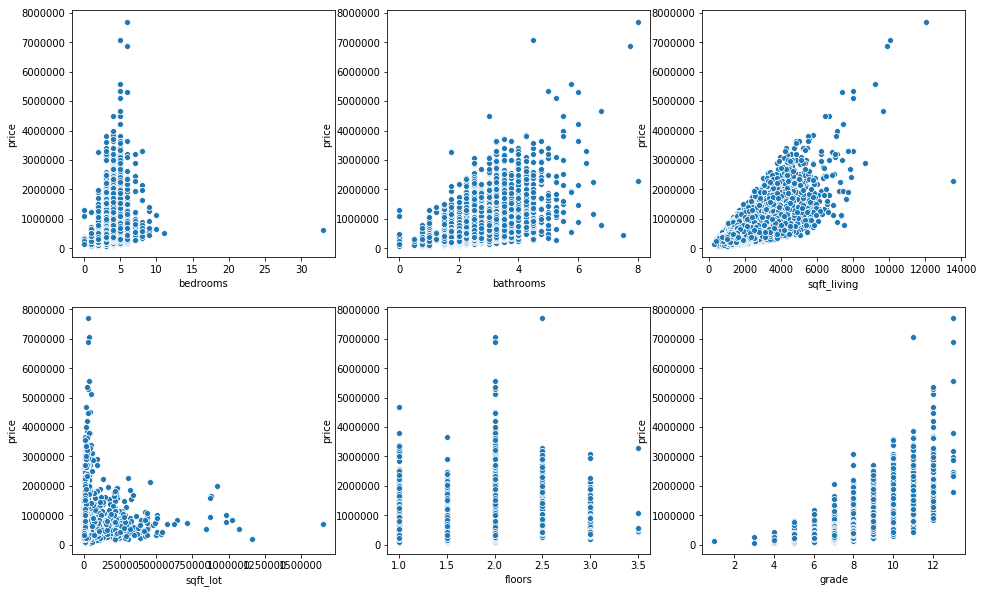

In [8]:
fig,axes =plt.subplots(2,3,figsize=(16,10))
sns.scatterplot(df['bedrooms'], df['price'],ax=axes[0,0])
sns.scatterplot(df['bathrooms'], df['price'],ax=axes[0,1])
sns.scatterplot(df['sqft_living'], df['price'],ax=axes[0,2])
sns.scatterplot(df['sqft_lot'], df['price'],ax=axes[1,0])
sns.scatterplot(df['floors'], df['price'],ax=axes[1,1])
sns.scatterplot(df['grade'], df['price'],ax=axes[1,2])

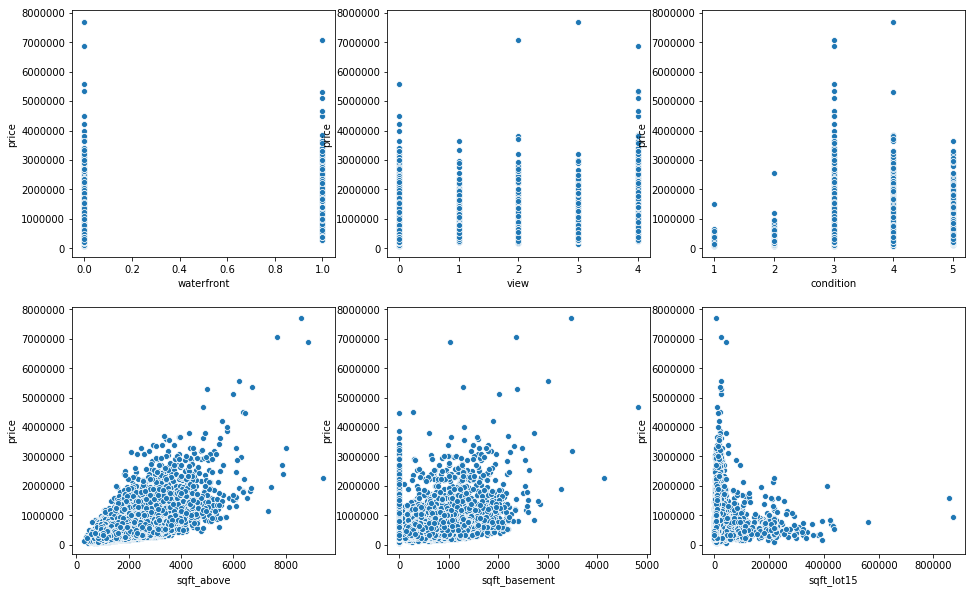

In [36]:
fig,axes =plt.subplots(2,3,figsize=(16,10))
sns.scatterplot(df['waterfront'], df['price'],ax=axes[0,0])
sns.scatterplot(df['view'], df['price'],ax=axes[0,1])
sns.scatterplot(df['condition'], df['price'],ax=axes[0,2])
sns.scatterplot(df['sqft_above'], df['price'],ax=axes[1,0])
sns.scatterplot(df['sqft_basement'], df['price'],ax=axes[1,1])
sns.scatterplot(df['sqft_lot15'], df['price'],ax=axes[1,2])

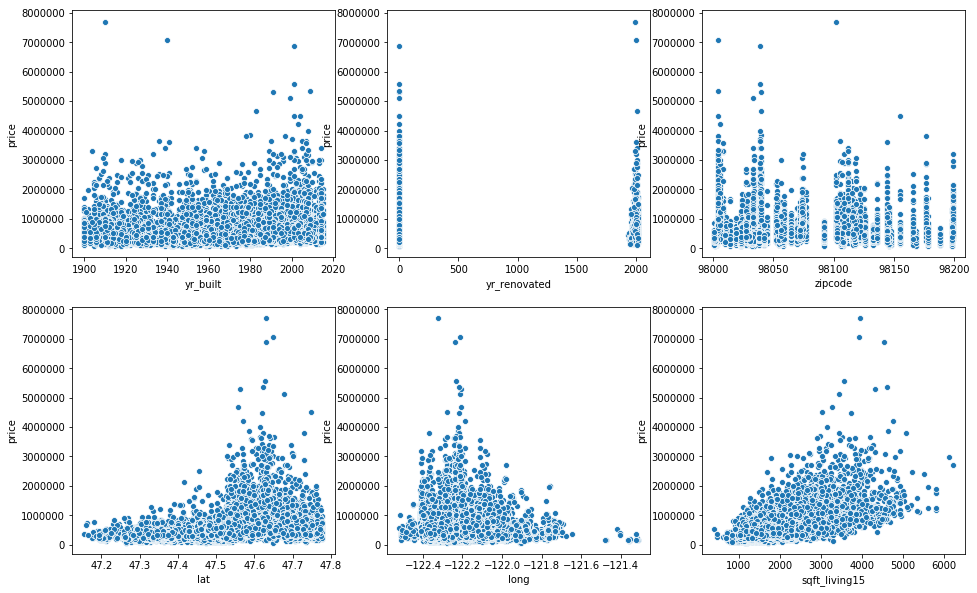

In [37]:
fig,axes =plt.subplots(2,3,figsize=(16,10))
sns.scatterplot(df['yr_built'], df['price'],ax=axes[0,0])
sns.scatterplot(df['yr_renovated'], df['price'],ax=axes[0,1])
sns.scatterplot(df['zipcode'], df['price'],ax=axes[0,2])
sns.scatterplot(df['lat'], df['price'],ax=axes[1,0])
sns.scatterplot(df['long'], df['price'],ax=axes[1,1])
sns.scatterplot(df['sqft_living15'], df['price'],ax=axes[1,2])

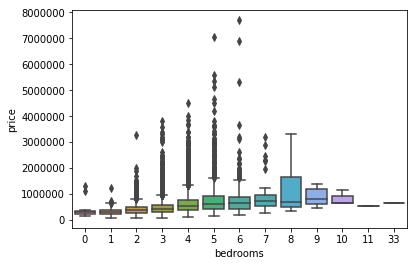

In [15]:
sns.boxplot(x='bedrooms',y='price',data=df)

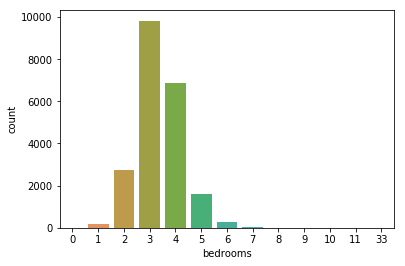

In [14]:
sns.countplot(df['bedrooms'])
plt.show()

The above plots show that bedrooms more than 10 are probably an outlier, so we will remove them.

In [23]:
df=df[df['bedrooms']<=10]

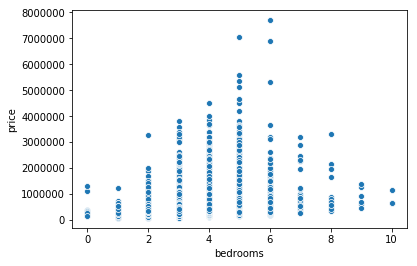

In [24]:
sns.scatterplot(df['bedrooms'], df['price'])

## Preparing the Data

In [25]:
from sklearn.model_selection import train_test_split

x=df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15127, 17)
(15127,)
(6484, 17)
(6484,)


## Training

In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Making predictions

In [29]:
y_pred = regressor.predict(X_test)

In [30]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [31]:
df2

,Actual,Predicted
9790,680200.0,6.643441e+05
10280,550000.0,5.174113e+05
19724,780000.0,8.899003e+05
20060,379950.0,4.360561e+05
21204,1061600.0,8.320012e+05
14544,325250.0,3.046030e+05
15937,279000.0,3.293727e+05
1710,453000.0,4.408217e+05
12659,158000.0,1.740414e+05
21184,468500.0,4.436635e+05


## Evaluating Algorithm

In [33]:
from sklearn import metrics

print('Mean Absolute Error - ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error - ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error - ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error -  125147.42506884168
Mean Squared Error -  47946144240.38875
Root Mean Squared Error -  218966.08011376727
